epoch=0: w=  0.5416. b=  0.0049, loss=12.66416901950297
epoch=10: w=  0.7384. b=  0.0323, loss=2.9108474780430345
epoch=20: w=  0.8575. b=  0.0480, loss=0.7634924790074206
epoch=30: w=  0.9256. b=  0.0567, loss=0.31155647931653596
epoch=40: w=  0.9601. b=  0.0609, loss=0.040310718537168104
epoch=50: w=  0.9746. b=  0.0625, loss=0.017341569070086365
epoch=60: w=  0.9825. b=  0.0633, loss=0.006917753512342807
epoch=70: w=  0.9863. b=  0.0636, loss=0.0023071762835155415
epoch=80: w=  0.9886. b=  0.0636, loss=0.0015548196562278106
epoch=90: w=  0.9898. b=  0.0634, loss=0.0011886159867178264
w=  0.9907. b=  0.0633, loss=0.0012368043788783887


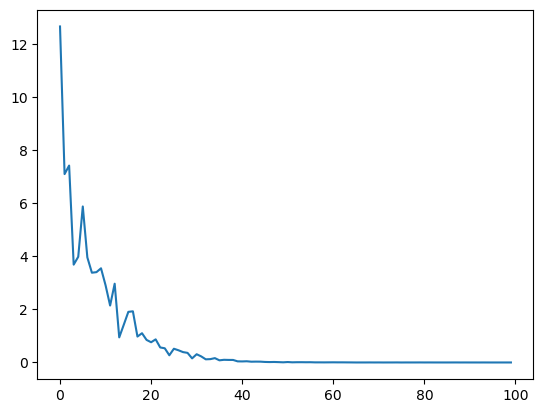

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(y, t):
    return np.sum((y-t)**2)/t.size

x = np.arange(12) # [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]
t = np.arange(12)

w = 0.5
b = 0
lr = 0.001  # 0.01, learning rate
loss_list = [ ]

train_size = t.size # 12
batch_size = 4
K = train_size// batch_size # 3

for epoch in range(100):
    loss = 0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x[mask]
        t_batch = t[mask]
        
        y = w*x_batch + b                               # calculate the output
        dW = np.sum((y-t_batch)*x_batch)/(2*batch_size) # gradients
        dB = np.sum((y-t_batch))/(2*batch_size)
        
        w = w - lr*dW   # update parameters
        b = b - lr*dB
        
        y = w*x_batch + b       # calculate the output
        loss += MSE(y, t_batch) # calculate MSE
    loss /= K  # average loss
    loss_list.append(loss)
    if not epoch%10:
        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={}".format(epoch, w, b, loss))

print("w={:>8.4f}. b={:>8.4f}, loss={}".format(w, b, loss))

plt.plot(loss_list)
plt.show() 
